   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 9.7 MB/s eta 0:00:00


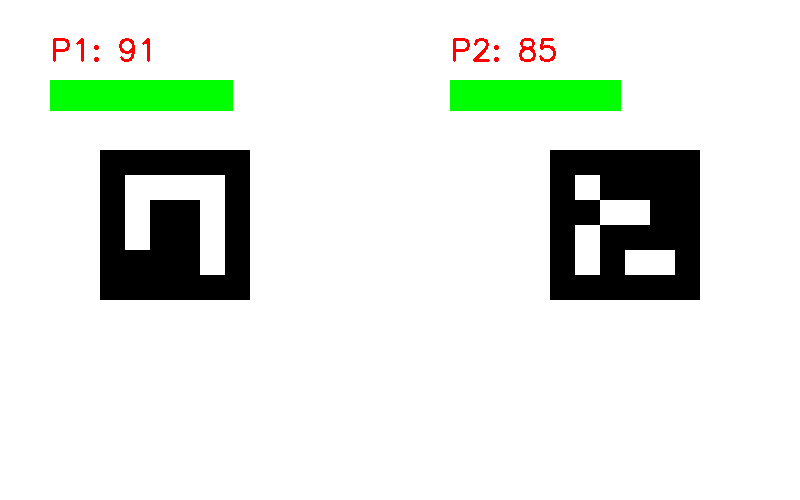

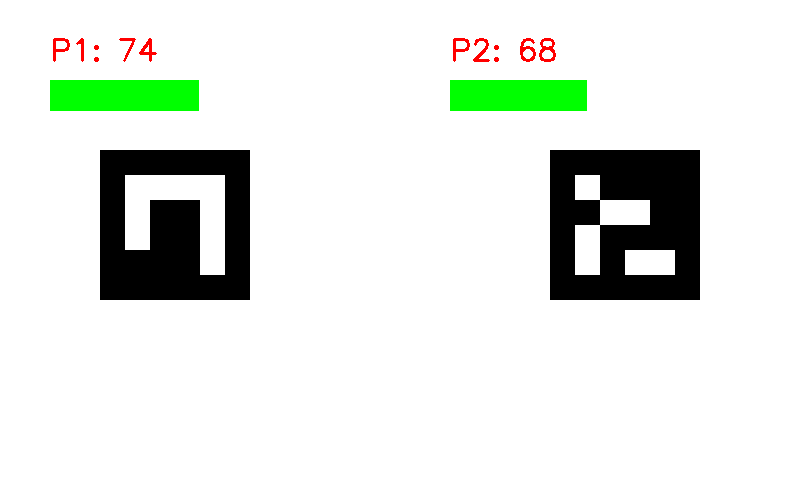

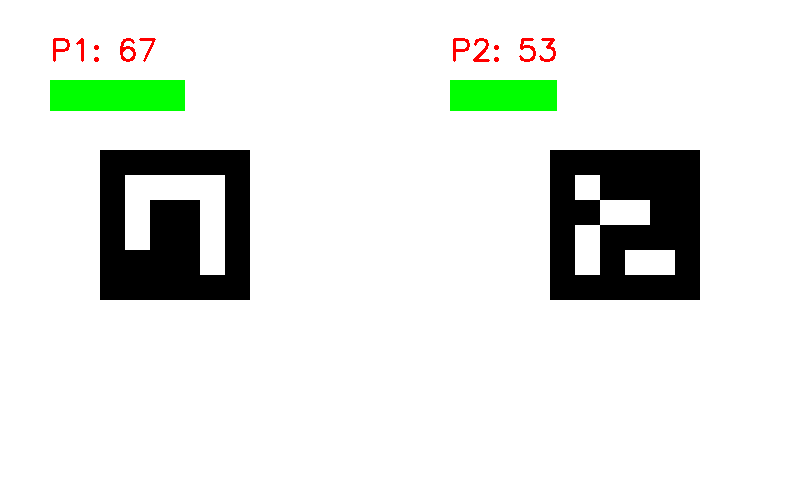

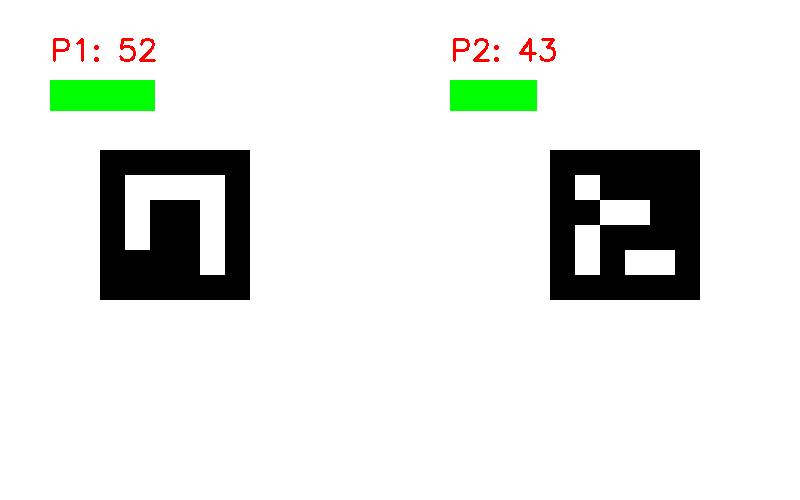

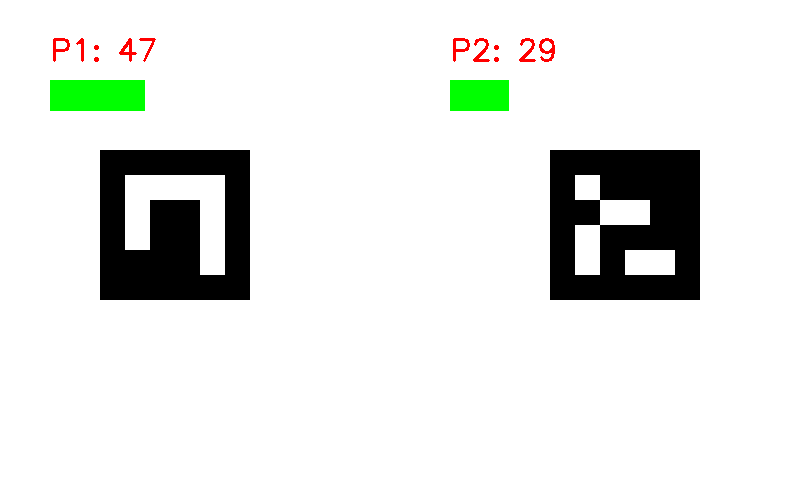

Player 1 Wins!


In [1]:
!pip install opencv-contrib-python-headless -q
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import time
aruco = cv2.aruco
dictionary = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)
player1_health = 100
player2_health = 100
for round in range(5):
    canvas = np.ones((500,800,3), dtype=np.uint8) * 255
    marker1 = aruco.generateImageMarker(dictionary, 10, 150)
    marker2 = aruco.generateImageMarker(dictionary, 20, 150)
    marker1 = cv2.cvtColor(marker1, cv2.COLOR_GRAY2BGR)
    marker2 = cv2.cvtColor(marker2, cv2.COLOR_GRAY2BGR)
    canvas[150:300, 100:250] = marker1
    canvas[150:300, 550:700] = marker2
    # Simulate attack
    player2_health -= np.random.randint(10,25)
    player1_health -= np.random.randint(5,20)
    # Health Bars
    cv2.rectangle(canvas, (50,80), (50+player1_health*2,110), (0,255,0), -1)
    cv2.rectangle(canvas, (450,80), (450+player2_health*2,110), (0,255,0), -1)
    cv2.putText(canvas, f"P1: {player1_health}", (50,60),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    cv2.putText(canvas, f"P2: {player2_health}", (450,60),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    cv2_imshow(canvas)
    time.sleep(1)
# Final Result
if player1_health > player2_health:
    print("Player 1 Wins!")
else:
    print("Player 2 Wins!")

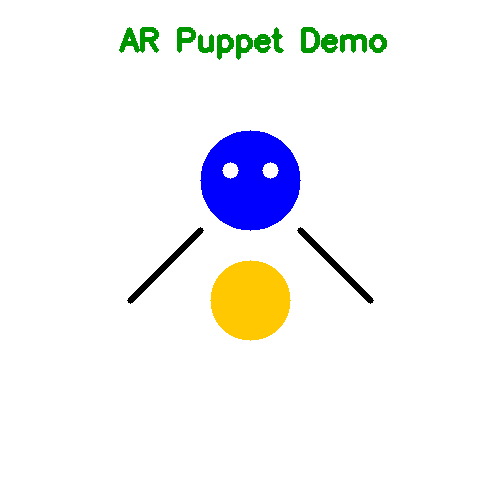

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Create blank canvas
img = np.ones((500,500,3), dtype=np.uint8) * 255
# Simulated hand center
hand_x, hand_y = 250, 300
# Draw fake hand
cv2.circle(img, (hand_x, hand_y), 40, (0,200,255), -1)
# Draw puppet head
cv2.circle(img, (hand_x, hand_y-120), 50, (255,0,0), -1)
# Draw eyes
cv2.circle(img, (hand_x-20, hand_y-130), 8, (255,255,255), -1)
cv2.circle(img, (hand_x+20, hand_y-130), 8, (255,255,255), -1)
# Draw arms
cv2.line(img, (hand_x-50, hand_y-70), (hand_x-120, hand_y), (0,0,0), 5)
cv2.line(img, (hand_x+50, hand_y-70), (hand_x+120, hand_y), (0,0,0), 5)
cv2.putText(img, "AR Puppet Demo", (120,50),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,150,0), 3)
cv2_imshow(img)